Beamformers:

1.   Delay and Sum
2.   MVDR
3.   GEV



---
\subsection{Test}
#Sum-And-Delay
##GCC-PHAT
Used to calculate the time delay (or diff) of arrival (TDOA)
####Generalized Cross-Correlation (GCC)
$r_{1}(t) = s(t) + n_{1}(t)$

$r_{2}(t) = s(t-D) + n_{2}(t)$

Where $r_{m}(t)$ is the signal recieved at microphone index $m$.

$s(t)$ is the source speech signal,  
$n_{m}(t)$ is the additive noise of microphone $m$,  
$D$ is the time lag, it took the source speech signal to arrive to one microphone compared to the other one.

<a href="https://google.com">Test Hyperlink</a>


---

The time difference, $D$, can be estimated by taking the cross-correlation between the signals and finding its maximum value.

#####Cross-Correlation
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/21/Comparison_convolution_correlation.svg/1920px-Comparison_convolution_correlation.svg.png" />
$\displaystyle\mathbf{R}_{XY} \triangleq \displaystyle\mathbf{E}[XY^{tr}]$

$$\displaystyle\mathbf{R}_{r_{1}r_{2}}(\tau) = \displaystyle\mathbf{E}[]$$

$$\displaystyle\mathbf{R}_{XX}(j\omega) = \frac{1}{T}\sum_{t=1}^{T}\mathbf{X}(t,j\omega)\mathbf{X}^H(t,j\omega)$$



H -> Hemiltonian transpose for complex variables


$\displaystyle\tau_m = argmax_{\tau} \int_{-\pi}^{+\pi}{\frac{X_1(j\omega) X_m(j\omega)^*}{|X_1(j\omega)||X_m(j\omega)|}e^{j\omega\tau}}d\omega$
####Phase Transform (PHAT)





In [2]:
! sudo apt-get install texlive-latex-recommended 
! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended  
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip 
! unzip type1cm.zip -d /tmp/type1cm 
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins
! sudo mkdir /usr/share/texmf/tex/latex/type1cm 
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm 
! sudo texhash 
! sudo apt-get install cm-super

Reading package lists... Done
Building dependency tree       
Reading state information... Done
texlive-latex-recommended is already the newest version (2017.20180305-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
dvipng is already the newest version (1.15-1).
texlive-fonts-recommended is already the newest version (2017.20180305-1).
texlive-latex-extra is already the newest version (2017.20180305-2).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
--2021-03-19 14:23:18--  http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip
Resolving mirrors.ctan.org (mirrors.ctan.org)... 5.35.249.60
Connecting to mirrors.ctan.org (mirrors.ctan.org)|5.35.249.60|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://ctan.math.washington.edu/tex-archive/macros/latex/contrib/type1cm.zip [following]
--2021-03-19 14:23:20--  http://ctan.math.

# MVDR

In [ ]:
%%capture
!pip install speechbrain

In [ ]:
%%capture
!wget https://www.dropbox.com/s/1bag9h3q588bjxx/speech_-0.82918_0.55279_-0.082918.flac
!wget https://www.dropbox.com/s/6vlnqgs076i846k/noise_diffuse.flac
!wget https://www.dropbox.com/s/esx4fetsvgjr3nt/noise_0.70225_-0.70225_0.11704.flac

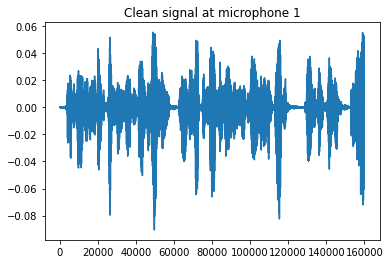

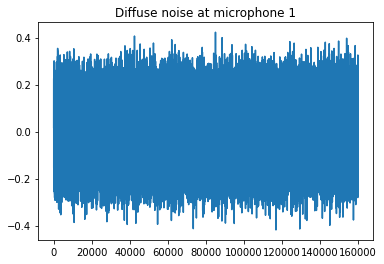

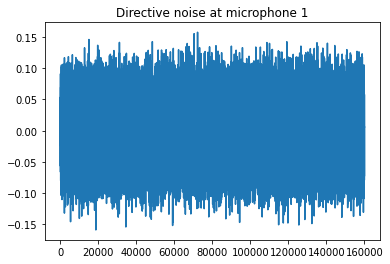

In [ ]:
import matplotlib.pyplot as plt
from speechbrain.dataio.dataio import read_audio

xs_speech = read_audio('speech_-0.82918_0.55279_-0.082918.flac') # [time, channels]
xs_speech = xs_speech.unsqueeze(0) # [batch, time, channels]
xs_noise_diff = read_audio('noise_diffuse.flac') # [time, channels]
xs_noise_diff = xs_noise_diff.unsqueeze(0) # [batch, time, channels]
xs_noise_loc = read_audio('noise_0.70225_-0.70225_0.11704.flac') # [time, channels]
xs_noise_loc =  xs_noise_loc.unsqueeze(0) # [batch, time, channels]
fs = 16000 # sampling rate

plt.figure(1)
plt.title('Clean signal at microphone 1')
plt.plot(xs_speech.squeeze()[:,0])
plt.figure(2)
plt.title('Diffuse noise at microphone 1')
plt.plot(xs_noise_diff.squeeze()[:,0])
plt.figure(3)
plt.title('Directive noise at microphone 1')
plt.plot(xs_noise_loc.squeeze(0)[:,0])
plt.show()